In [124]:
import numpy as np
import nltk
from stop_words import get_stop_words
from nltk.corpus import stopwords
import re
from nltk.stem.porter import *
from collections import Counter
from collections import defaultdict
from matplotlib import pyplot as plt
from scipy import special
import operator
from math import log

read a file

In [125]:
stop_words = list(get_stop_words('en'))         #About 900 stopwords
nltk_words = list(stopwords.words('english')) #About 150 stopwords

In [126]:
def preprocess(sent):
    stemmer = PorterStemmer()
    #tokenization
    words = str(sent).split()
    new_words = []
    for w in words:
        #lowercase
        w = w.lower()
        #remove stopwords, you can change the stopwords list in here
        if w not in stop_words:
            w = stemmer.stem(w)
            new_words.append(w)
        
    return ' '.join(new_words)

In [127]:
with open ('bible.txt') as f:
    bible = open("bible_processed.txt", "w")
    frequency = defaultdict(int)
    for line in f:
        newline = preprocess(line)                
        #print (newline)
        for w in newline.split():
            frequency[w] += 1
            #frequency_list = frequency.keys()


In [128]:
#let's see the dictionary
iterator = 0
for key in frequency.keys():
    print (key, frequency[key])
    iterator = iterator + 1
    if iterator > 10:
        break

﻿the 1
project 83
gutenberg 25
ebook 12
king 2063
jame 29
bibl 8
use 72
anyon 4
anywher 2
cost 5


In [129]:
word_and_rank = {key: rank for rank, key in enumerate(sorted(frequency, key=frequency.get, reverse=True), 1)}
y = [log(frequency[i]) for i in sorted(frequency, key=frequency.get, reverse=True)]
x = [log(i) for i in range(1, len(y)+1)]


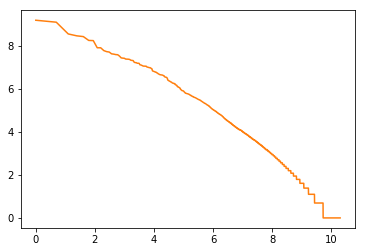

In [130]:
plt.plot(x, y)
plt.show()

Plot the distribution of the first digit in frequences obtained and observe Beford's law. Try again while neglecting the one digit frequencies (frequencies less than 10), and check if the law still applies.


In [133]:
f = frequency.values()

In [134]:
#build a first digit dict
firsts = []
for i in f:
    first = int(str(i)[:1])
    firsts.append(first)
fir = np.array(firsts)

digit_freq = defaultdict(int)
for d in fir:
    digit_freq[d] += 1        

digits = digit_freq.values()
digit_freq.keys()

dict_keys([1, 8, 2, 7, 4, 5, 6, 3, 9])

In [135]:
sorted(digit_freq.values())

[529, 606, 772, 1001, 1331, 1802, 2888, 5246, 15652]

In [136]:
sorted_x = sorted(digit_freq.items(), key=operator.itemgetter(1))
sorted_x

[(9, 529),
 (8, 606),
 (7, 772),
 (6, 1001),
 (5, 1331),
 (4, 1802),
 (3, 2888),
 (2, 5246),
 (1, 15652)]

In [137]:
x = [k for k, _ in sorted_x]
y = [v for _, v in sorted_x]
x,y

([9, 8, 7, 6, 5, 4, 3, 2, 1],
 [529, 606, 772, 1001, 1331, 1802, 2888, 5246, 15652])

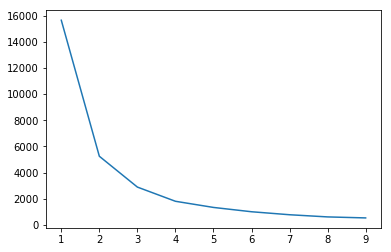

In [140]:
plt.plot(x,y)
plt.show()

In [ ]:
#heaps law

In [229]:
def heaps_law(file):
    with open (file) as f:
        frequency = defaultdict(int)
        uniq = set()
        for line in f:
            newline = preprocess(line)                
            for i, token in enumerate(newline.split()):
                uniq.add(token)
                print (i, len(uniq))

this is how dictionary works

In [70]:
dicti = {'Name': 'Zara', 'Age': 7}

In [73]:
dicti.items()

dict_items([('Name', 'Zara'), ('Age', 7)])

In [74]:
dicti.keys()

dict_keys(['Name', 'Age'])

In [75]:
dicti.values()

dict_values(['Zara', 7])

In [110]:
dicti.get('Age')
for key in dicti:
    print(dicti.get(key))

Zara
7


In [111]:
y = [log(frequency[i]) for i in sorted(frequency, key=frequency.get, reverse=True)]

In [104]:
frequency.get()

TypeError: get expected at least 1 arguments, got 0